In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df)

# predict/transform
scaled_data = scaler.transform(df)

In [6]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Set the coinid column as index
df_scaled.set_index(df.index, inplace=True)

# Display sample data
df_scaled.head(10) 

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Scaled Data.

#### Elbow Curve A: Inertia Only, Range 1 to 11

In [7]:
# Define your "X" - features to predict
X = df_scaled

In [8]:
# Create an empty list to store the inertia values
inertia_a = []

# Create a list with the number of k-values from 1 to 11
k_a = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k_a:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_a_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_scaled`
    k_a_model.fit(X)
    
    # predict the model
    preds_a = k_a_model.predict(X)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_a.append(k_a_model.inertia_)

    
    print(f"Finished {i} out of {max(k_a)}")

Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [9]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data_a = {"k": k_a, "inertia": inertia_a}
df_elbow_a = pd.DataFrame(elbow_data_a)

df_elbow_a["acc"] = df_elbow_a.inertia.diff()

# Review the DataFrame
df_elbow_a.head(20)

,k,inertia,acc
0,1,287.000000,NaN
1,2,212.123342,-74.876658
2,3,165.136752,-46.986590
3,4,79.022435,-86.114317
4,5,66.413051,-12.609385
5,6,61.634088,-4.778963
6,7,46.074467,-15.559621
7,8,43.392694,-2.681773
8,9,32.913223,-10.479471
9,10,30.469111,-2.444111


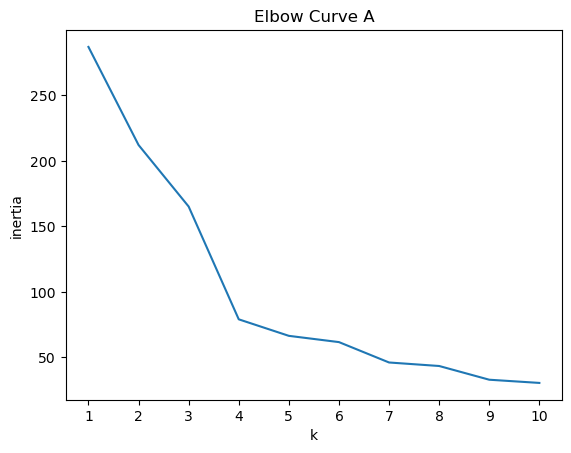

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# using matplotlib
plt.plot(df_elbow_a["k"], df_elbow_a["inertia"])
plt.title("Elbow Curve A")
plt.xticks(df_elbow_a["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# using hv plot
elbow_plot = df_elbow_a.hvplot.line(
    width=600,
    height=400,
    x="k", 
    y="inertia", 
    title="Elbow Curve Using Scaled Data", 
    xticks="k")
elbow_plot

:Curve   [k]   (inertia)

### Elbow Curve B: Inertia, Silhouette & Calinski Harabasz, Range 2 to 20 

In [12]:
# Define "X" - features to predict
X = df_scaled

In [13]:
#Booth's way
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a list with the number of k-values from 2 to 20
k = list(range(2, 20))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_scaled`
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # 3. Append the inertia, silhouete and cha scores to their lists
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [14]:
# Create a dictionary with the data to plot the Elbow curve
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,212.123342,0.690885,13.766470,NaN
1,3,165.136752,0.260810,14.021117,-46.986590
2,4,79.022435,0.314482,32.459853,-86.114317
3,5,66.413051,0.323913,29.892958,-12.609385
4,6,61.634088,0.251616,25.595599,-4.778963
5,7,46.074467,0.258868,29.631263,-15.559621
6,8,43.392694,0.252185,26.466078,-2.681773
7,9,32.913223,0.260185,30.879599,-10.479471
8,10,30.469111,0.168099,29.000071,-2.444111
9,11,26.480101,0.175935,29.514981,-3.989010


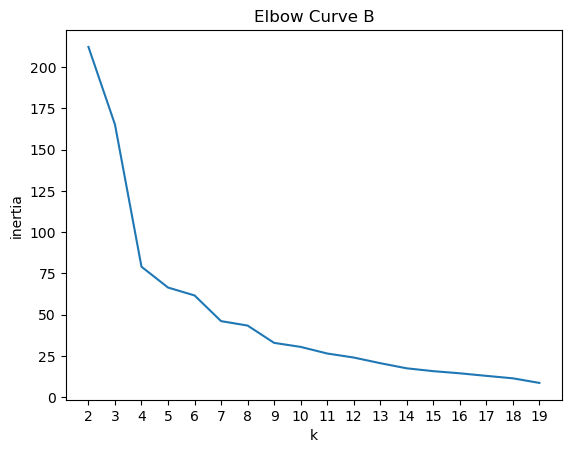

In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve B")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Scaled Data

In [16]:
df_sub = df_scaled.copy()

# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model

# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

# Fit the K-Means model using the scaled data
model.fit(X)

# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [17]:
# Create a copy of the DataFrame
df_sub2 = df_sub.copy()

# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

# Display sample data
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_sub2.hvplot.scatter(
    width=600,
    height=400,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters",
    colormap='rainbow', #colormap, chat gbt
    hover_cols=['coin_id']).opts(bgcolor='darkgray') # background, chat gbt
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3
pca=PCA(n_components=n_components)

In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)

print(pca_data)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

[0.3719856  0.34700813 0.17603793]


In [22]:
sum(explained_variance_ratio[0:])

0.8950316570309842

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309842

In [23]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=["PC" + str(x) for x in range(1, n_components + 1)])

# Copy the crypto names from the original data
names = df_scaled.index

# Set the coinid column as index
df_pca.set_index(names, inplace=True)

# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

#### Elbow Curve A: Inertia Only, Range 1 to 11

In [24]:
# Define "X" - features to predict
X = df_pca

In [25]:
# Create a list with the number of k-values from 1 to 11
inertia_a = []

# Create a list with the number of k-values from 1 to 11
k_a = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k_a:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_a_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_pca`
    k_a_model.fit(X)
    
    # predict the model
    preds_a = k_a_model.predict(X)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_a.append(k_a_model.inertia_)

    print(f"Finished {i} out of {max(k_a)}")

Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [26]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data_a = {"k": k_a, "inertia": inertia_a}
pca_df_elbow_a = pd.DataFrame(pca_elbow_data_a)

pca_df_elbow_a["acc"] = pca_df_elbow_a.inertia.diff()

# Review the DataFrame
pca_df_elbow_a.head(20)

,k,inertia,acc
0,1,256.874086,NaN
1,2,182.339530,-74.534555
2,3,135.442408,-46.897122
3,4,49.665497,-85.776911
4,5,38.672582,-10.992914
5,6,34.507577,-4.165006
6,7,23.728365,-10.779212
7,8,18.574523,-5.153841
8,9,15.572672,-3.001851
9,10,11.407667,-4.165006


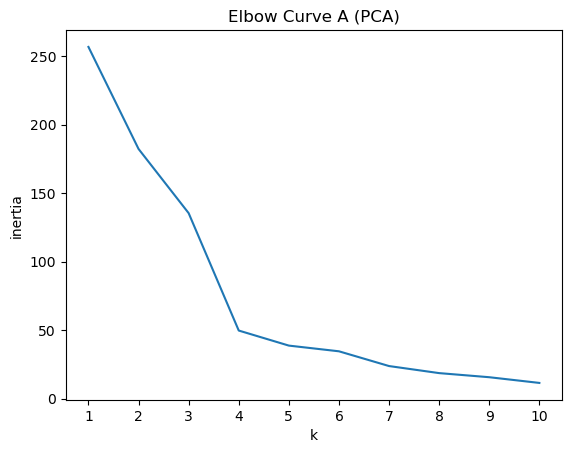

In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# using matplotlib
plt.plot(pca_df_elbow_a["k"], pca_df_elbow_a["inertia"])
plt.title("Elbow Curve A (PCA)")
plt.xticks(pca_df_elbow_a["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# using hv plot
elbow_plot_pca = pca_df_elbow_a.hvplot.line(
    width=600,
    height=400,
    x="k", 
    y="inertia", 
    title="Elbow Curve Using PCA Data", 
    xticks="k")
elbow_plot_pca

:Curve   [k]   (inertia)

### Elbow Curve B: Inertia, Silhouette & Calinski Harabasz, Range 2 to 20 

In [29]:
#define X 
X = df_pca

In [30]:
#Booth's way
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a list with the number of k-values from 2 to 20
k = list(range(2, 20))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_pca`
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # 3. Append the inertia, silhouete and cha scores to their lists
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [31]:
# Create a dictionary with the data to plot the Elbow curve
# Define a DataFrame to hold the values for k and the corresponding inertia
pca_elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
pca_df_elbow = pd.DataFrame(pca_elbow_data)

pca_df_elbow["acc"] = pca_df_elbow.inertia.diff()

# Review the DataFrame
pca_df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,182.339530,0.728406,15.941950,NaN
1,3,135.442408,0.356130,17.034560,-46.897122
2,4,49.665497,0.420800,51.455694,-85.776911
3,5,38.672582,0.405662,50.780512,-10.992914
4,6,34.507577,0.334511,45.107936,-4.165006
5,7,23.728365,0.375378,55.678472,-10.779212
6,8,18.574523,0.316385,60.481348,-5.153841
7,9,15.572672,0.323751,61.980734,-3.001851
8,10,11.407667,0.350621,74.116423,-4.165006
9,11,8.058822,0.361557,92.624679,-3.348845


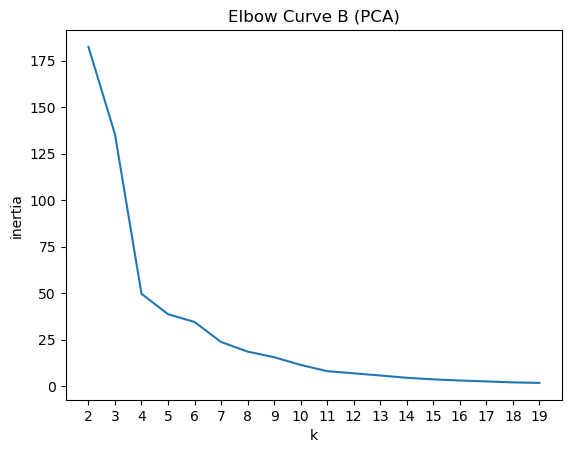

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# using matplot lib
plt.plot(pca_df_elbow["k"], pca_df_elbow["inertia"])
plt.title("Elbow Curve B (PCA)")
plt.xticks(pca_df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [33]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

# Fit the K-Means model using the PCA data
model.fit(X)

# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [34]:
# Create a copy of the DataFrame with the PCA data
df_pca_sub = df_pca.copy()

# Predict the clusters to group the cryptocurrencies using the PCA data
df_pca_sub['clusters'] = preds

# Display sample data
df_pca_sub.head()

,PC1,PC2,PC3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [35]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_sub.hvplot.scatter(
    width=600,
    height=400,
    x="PC1",
    y="PC2",
    c="clusters",
    colormap='rainbow', #colormap, chat gbt
    hover_cols=['coin_id']).opts(bgcolor='darkgray') #background, chat gbt
scatter_plot_pca

:Scatter   [PC1]   (PC2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [36]:
# Composite plot to contrast the Elbow curves
composite_elbow = elbow_plot + elbow_plot_pca
composite_elbow

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [37]:
# Composite plot to contrast the clusters
composite_scatter = scatter_plot + scatter_plot_pca
composite_scatter

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,clusters,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features (through PCA) does not significantly affect the performance of the K-Means clustering in this case. The clustering patterns are preserved, and the elbow curve indicates that the optimal number of clusters remains consistent.